In [1]:
from torchvision import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import torch.utils.data as DATA
import numpy as np

In [2]:
Data_mnist = datasets.MNIST('data',download ='true')

In [4]:
train_set, test_set = DATA.random_split(Data_mnist, [36000, 24000])


In [5]:
train_set=np.array(train_set)
test_set=np.array(test_set)

<ipython-input-5-7da07fec6596>:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  train_set=np.array(train_set)
<ipython-input-5-7da07fec6596>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_set=np.array(train_set)
<ipython-input-5-7da07fec6596>:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`_

In [6]:
train_x=train_set[:,0]
train_y=train_set[:,1]
train_y=train_y.astype('int')
train_x=np.stack(train_x)
train_x=train_x.reshape((train_x.shape[0],-1))

In [7]:
test_x=test_set[:,0]
test_y=test_set[:,1]
test_y=test_y.astype('int')
test_x=np.stack(test_x)
test_x=test_x.reshape((test_x.shape[0],-1))

In [9]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=28*28)
pca.fit(train_x)

PCA(n_components=784)

In [12]:
comps = pca.components_[:7, :]

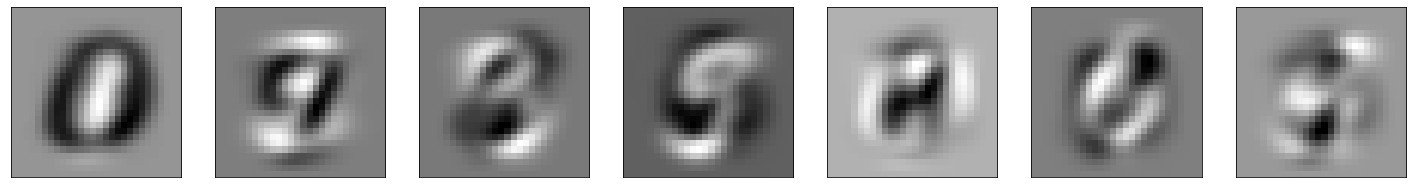

In [22]:
plt.figure(figsize=(25,40))

for i in range(0,7):
    picture = np.reshape(comps[i], (28, 28))
    plt.subplot(7, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(picture, cmap="binary")
 

Text(0, 0.5, 'explained_variance_ratio')

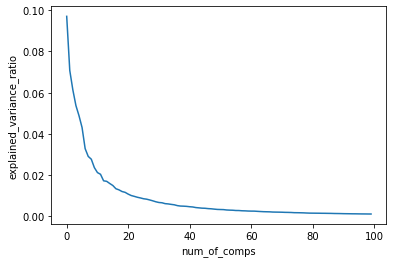

In [38]:
eratio = pca.explained_variance_ratio_[0:100]
plt.plot(range(100), eratio)
plt.xlabel('num_of_comps')
plt.ylabel('explained_variance_ratio')

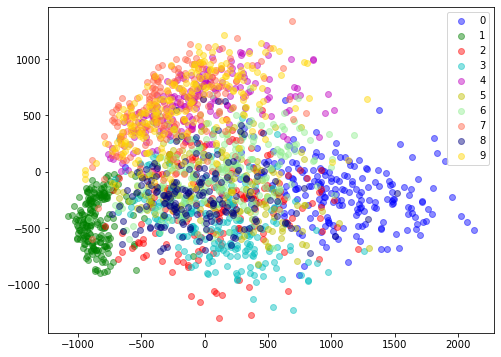

In [49]:
projected_x = pca.transform(test_x)
projected_x = projected_x[:2000, :2]
testy = test_y[:2000]
colors = ["b", "g", "r", "c", "m", "y", "lightgreen", "tomato", "navy", "gold"]
plt.figure(figsize = (8, 6))
for i in range(0,10):
    plt.scatter(projected_x[testy == i, 0], projected_x[testy == i, 1], color = colors[i], alpha = 0.45, label = str(i))
plt.legend() 



In [ ]:
############ Вывод ############
# Можно увидеть, что хорошо отделимы только облака соответсвующие цифрам 0,1.
# Остальные облака сильно перемешаны -> данный метод не является информативным с точки зрения представления датасета
# и в общем случае не эффективен для задачи классификации.